# **Predictive Analysis of Academic Performance Utilizing Study Habits and Prior Achievement Metrics**

In [1]:
# libraries needed in this proposal

library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## **Introduction**

#### **Contextual Background and Relevance of the Topic**

The transformational impact of the digital revolution on our education system is evident, particularly with the introduction of web-based learning systems. These platforms have expanded the boundaries of traditional classrooms and provided researchers with unprecedented opportunities to explore the nuances of student engagement. Within this context, our research focuses on examining various behavioral variables as they relate to student performance. Building on the work of Kahraman et al. (2013), we aim to contribute further insights into the complex dynamics of the digital learning environment.

#### **Primary Objectives and Research Questions of Our Project**

Our study sets out to address two related research questions. The primary aim is to explore whether it is possible to predict a student's level of knowledge (UNS) by examining a selected set of behavioral variables, including study time for material (STG), repetition number for material (SCG), study time for related objects like prerequisites (STR), exam performance for related objects (LPR), and exam performance for material (PEG). Secondly, we aim to analyze the strength of the correlation between different combinations of the variables (STG, SCG, STR, and LPR) and PEG, the exam performance for the material. By doing so, we strive to ascertain the most significant determinants of exam performance in a digital learning platform. Upon finding the most significant combination from the power set of the variables, we aim to create a linear regression model to predict PEG.

#### **Comprehensive Description and Justification of the Dataset Employed**

The foundation of our study comprises a CSV dataset consisting of 258 entries. These datasets include variables representing study time (STG), repetition number (SCG), study time for related objects (STR), exam performance for related objects (LPR), material exam performance (PEG), and user knowledge level (UNS). The selection of these variables is based on their potential relevance in predicting students' knowledge levels and academic performance. These datasets provide a rich foundation for our research, allowing us to investigate the intricate relationships between these variables and academic performance in a digital learning environment.

#### **Rationale Underpinning the Choice of Predictors**

The selection of these variables is based on a course modeling approach developed by Cristea & Mooij (2003), in which learning resources for students are broken down into concept maps and linked concepts. It is generally understood that dedicated study time (STG) and frequent repetition of the material (SCG) foster a deeper understanding and assimilation of academic content, potentially resulting in elevated knowledge levels. Similarly, the time invested in studying related prerequisite objects (STR) and the ensuing performance on these related objects (LPR) can ostensibly influence a student's comprehension of the current material, affecting their cumulative knowledge level. Lastly, a student's performance in the material exam (PEG) is, in principle, a direct manifestation of their understanding of the content, suggesting it is a strong predictor of knowledge level. Our research seeks to validate these hypotheses and elucidate the relative impact of each variable on academic performance, thereby informing future pedagogical practices and educational policy decisions.

## **Methods & Results**

#### **Data preparation**
Initially, we imported the dataset we intend to use in our study into a CSV format. Then, we uploaded this csv file into a dedicated remote repository for this project. In the code snippet below, we load the raw format of this csv formated content into this report.

In [30]:
# download data from our group's remote repository

url <- "https://raw.githubusercontent.com/stankur/dsci-100-project/main/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.csv"

data <- read_csv(url)

data <- data |> 
        select(STG:UNS)
cat("Table 1: Data summary")
data

New names:
• `` -> `...7`
• `` -> `...8`
Rows: 258 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UNS, Attribute Information:
dbl (5): STG, SCG, STR, LPR, PEG
lgl (2): ...7, ...8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Table 1: Data summary

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


#### **Exploratory Data Analysis**
To gain insights into the data, we will perform an exploratory data analysis. This involves computing summary statistics, checking for missing values, and visualizing the distributions and relationships between variables using plots and charts. We will utilize ggpairs to conduct a pairwise correlation analysis, in which if a variable is found to be highly correlated with another, we will remove one of these variables.


In [31]:
# Mean values of quantitative variables
mean_data <- data |>
                mutate(STG = mean(STG),  
                       SCG = mean(SCG), 
                       STR = mean(STR),
                       LPR = mean(LPR),
                       PEG = mean(PEG)) |>
                select(STG, SCG, STR, LPR, PEG) |>
                head(1)

# Checking for missing data
na <- data |> 
            mutate(STG = is.na(STG), SCG = is.na(SCG), 
                   STR = is.na(STR), LPR = is.na(LPR), 
                   PEG = is.na(PEG), UNS = is.na(UNS)) |>
            select(STG, SCG, STR, LPR, PEG, UNS) |>
            head(1)

# Summary of 'UNS' categorical variable
uns_grouped_by_level <- group_by(data, UNS) |>
                        summarize(count = n())

# Transforming data for reporting
mean_tidy <- mean_data |>
        pivot_longer(cols = STG:PEG,
                    names_to = "Feature", values_to = "Mean") 

na_tidy <- na |>
        pivot_longer(na, cols = STG:UNS,
                    names_to = "Feature", values_to = "NA")

tidy <- data.frame("Feature" = c("STG", "SCG", "STR", "LPR", "PEG", "UNS"),
                   "Mean" = c(0.3711473, 0.3556744, 0.4680039, 0.4327132, 0.4585388, "NA"),
                   "Is.NA" = c(FALSE, FALSE, FALSE, FALSE, FALSE, FALSE)) |>
        as_tibble(tidy)
cat("Table 2: Tidy Data Summary")
tidy
cat("Table 3: UNS Grouped by Level Summary")
uns_grouped_by_level

Warning message in gsub(vec_paste0("^", names_prefix), "", cols):
“argument 'pattern' has length > 1 and only the first element will be used”


Table 2: Tidy Data Summary

Feature,Mean,Is.NA
<chr>,<chr>,<lgl>
STG,0.3711473,FALSE
SCG,0.3556744,FALSE
STR,0.4680039,FALSE
LPR,0.4327132,FALSE
PEG,0.4585388,FALSE
UNS,NA,FALSE


Table 3: UNS Grouped by Level Summary

UNS,count
<chr>,<int>
High,63
Low,83
Middle,88
very_low,24


Our initial visualization consists of histograms illustrating the distribution of numerical variables (STG, SCG, STR, LPR, PEG), effectively revealing their range and frequency. Following this, we present a bar chart showcasing the distribution of categorical variable UNS (knowledge level), enabling a comparative analysis of each knowledge level category's frequency.

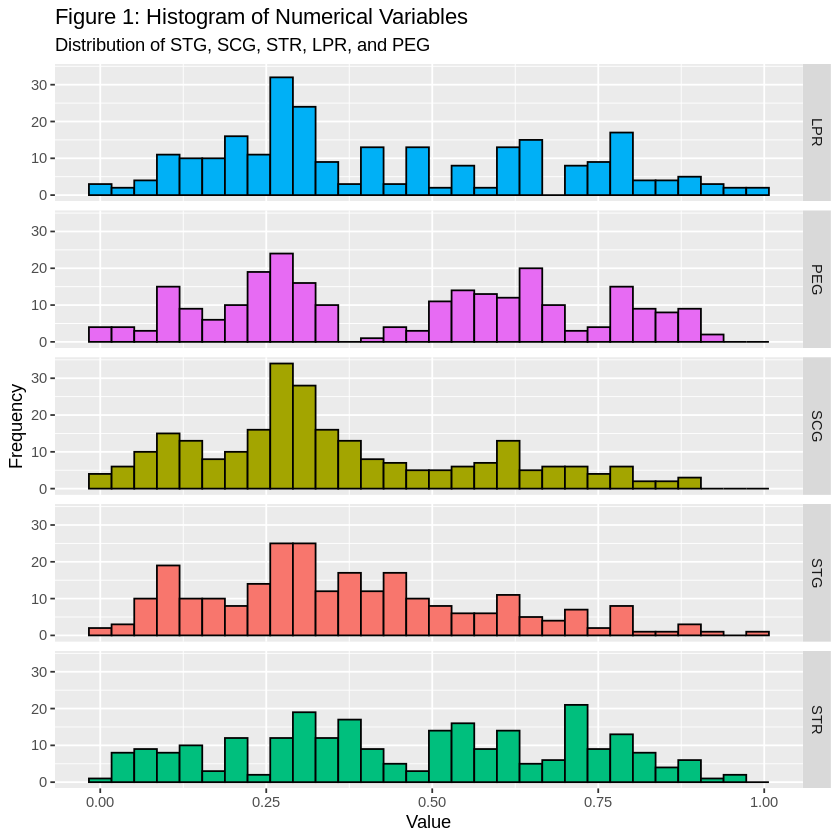

In [32]:
# Selecting numerical columns for visualization
histogrammable_data <- data |> select(STG:PEG)

# Reshaping the data from wide format to long format to facilitate visualization
histogrammable_data_pivoted <- pivot_longer(histogrammable_data, 
                                           cols= STG:PEG,
                                           names_to = "column_name",
                                           values_to ="value")

# Creating a histogram for each numerical variable
quantitative_plot <- ggplot(histogrammable_data_pivoted, aes(x = value, fill = as_factor(column_name))) +
        geom_histogram(bins = 30, color = "black") + 
        facet_grid(rows = vars(column_name)) +  
        labs(fill = "Variable", 
             x = "Value", 
             y = "Frequency", 
             title = "Figure 1: Histogram of Numerical Variables", 
             subtitle = "Distribution of STG, SCG, STR, LPR, and PEG") +
        theme(legend.position = "none") 

quantitative_plot

The histograms reveals several points regarding the nature of our numerical variables. First of all, each of these variables has a range of 0 to 1 inclusive. They are all multimodal with multiple peaks, and also share a maximum peak at around the value of 0.25. 

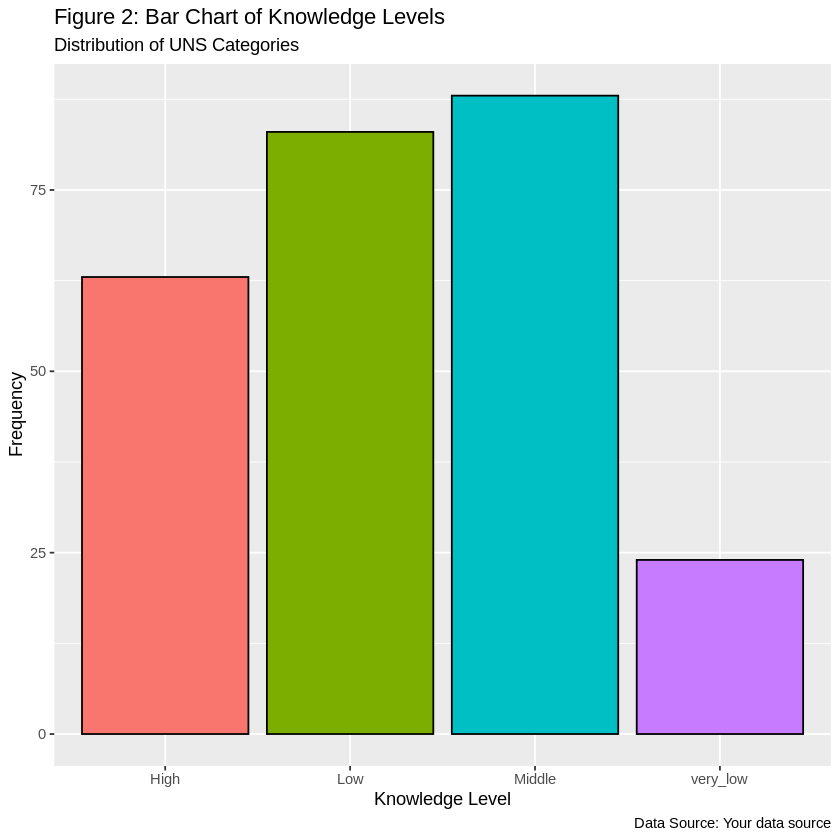

In [33]:
# Organize categories in descending order
uns_grouped_by_level <- uns_grouped_by_level |> 
                        mutate(UNS = factor(UNS, levels = names(sort(table(UNS), decreasing = TRUE))))

# Create bar chart for the categorical variable 'UNS'
uns_bar <- ggplot(uns_grouped_by_level, aes(x=UNS, y=count, fill=UNS)) + 
        geom_bar(stat="identity", color="black") + 
        labs(x="Knowledge Level", 
             y="Frequency", 
             title = "Figure 2: Bar Chart of Knowledge Levels", 
             subtitle = "Distribution of UNS Categories", 
             fill="Knowledge Level",
             caption = "Data Source: Your data source") +
        theme(legend.position = "none")

uns_bar

The bar chart reveals that there is a trend of increase followed by descent after a mid peak in the frequencies of the various levels of user knowledge, going from very low to high. The user knowledge level with the maximum frequency is middle. The user knowledge with the least frequency is very low.


In the following code snippet, we utilize ggpairs to visualize the pairwise relationship between every possible pair of numerical variables present in our dataset.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



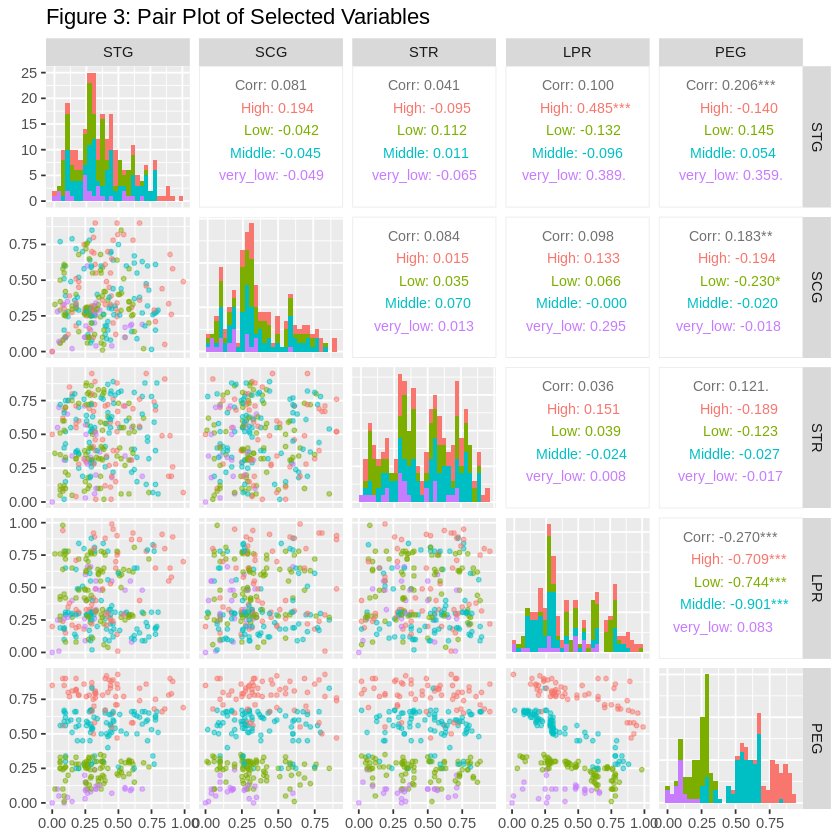

In [34]:
# Select numerical columns for visualization
data_for_ggpairs <- data |> select(STG:PEG)

# Create a pairs plot with ggpairs() function
pairs_plot <- ggpairs(data_for_ggpairs, 
                      mapping = ggplot2::aes(color = data$UNS),
                      upper = list(continuous = wrap("cor", size = 3)),  # display correlation on the upper part
                      diag = list(continuous = wrap("barDiag")),  # display histogram on the diagonal
                      lower = list(continuous = wrap("points", alpha = 0.5, size = 1))) +  # display scatterplot on the lower part
                      ggtitle("Figure 3: Pair Plot of Selected Variables")

# Print the plot
print(pairs_plot)

Upon inspecting the generated pairwise scatterplots, we observe that every pair of the variables in dataset of our study exert negligible correlation. Hence, we shall not eliminate any variable from the construction of our models.

### **Data Analysis**
We selected the K-Nearest Neighbors (KNN) algorithm and linear regression to address the research questions. 

#### **Linear Regression**

Linear regression is a statistical modeling technique used to establish a relationship between a dependent variable and one or more independent variables. It aims to find the best-fitting linear equation that predicts the value of the dependent variable based on the values of the independent variables that minimize the RMSE (Root Mean Square Error) between the predicted values and the actual values.

In the context of finding a relationship between predicted values and actual values, linear regression can help quantify the extent to which the predicted values align with the actual values. It allows us to assess the accuracy of our predictions and understand the level of association between the variables of interest.


The basic idea behind linear regression is to fit a straight line to the data points in a way that minimizes the overall difference between the predicted values and the actual values.

When linear regression is extended to multiple independent variables, known as multiple linear regression, the equation becomes:
$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_mX_m$

$X_1, X_2, ..., X_m$ represent the different independent variables, and $\beta_0$ is intercept, and $\beta_1, \beta_2, ..., \beta_m$ are the corresponding coefficients (slope).


To evaluate the performance of the models constructed from the different combinations of variables under the training dataset, we will use appropriate metrics depending on the task. For evaluation PEG prediction, we will utilize the regression metric $RMSE$.

$\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
$

$\text{RMSE}$ / $\text{RMSPE}$ takes the squared difference between each observed value $y_i$ and its corresponding predicted value $\hat{y}_i$, sums up all these squared differences, divides by the total number of observations $n$, and then takes the square root of the result. Since it squares the differences, it is sensitive to outliers reflecting their influence on the model’s accuracy.


In [7]:
# Set seed for reproducibility
set.seed(9999)

# Split the data
data_split <- initial_split(data, prop = 0.75, strata = UNS)
data_train <- training(data_split)
data_test <- testing(data_split)


In [29]:
# Use linear regression
lm_spec <- linear_reg() |>
            set_engine("lm") |>
            set_mode("regression")

# Define names of the predictiors
predictor_names <- c("STG", "SCG", "STR", "LPR")

# Create an empty tibble to store the results
results <- tibble(model_string = character(), rmpse = double(), rmse = double())

# Generate power set of predictors excluding the empty set
# Credit to https://stackoverflow.com/questions/18715580/algorithm-to-calculate-power-set-all-possible-subsets-of-a-set-in-r
predictor_combinations <- unlist(lapply(seq_along(predictor_names), function(x) combn(predictor_names, x, simplify = FALSE)), recursive = FALSE)

# For every combination of predictors
for (predictors in predictor_combinations) {
  # Create a model string for this combination of predictors
  model_string <- paste("PEG", "~", paste(predictors, collapse="+"))

  # Create a recipe from the model string
    lm_recipe <- recipe(as.formula(model_string), data = data_train)
    
    data_fit <- workflow() |>
                add_model(lm_spec) |>
                add_recipe(lm_recipe) |>
                fit(data_train)
    
    lm_rmse <- data_fit |>
             predict(data_train) |>
             bind_cols(data_train) |>
             metrics(truth = PEG, estimate = .pred) |>
             filter(.metric == "rmse") |>
             select(.estimate) |>
             pull()

    lm_rmspe <- data_fit |>
             predict(data_test) |>
             bind_cols(data_test) |>
             metrics(truth = PEG, estimate = .pred) |>
             filter(.metric == "rmse") |>
             select(.estimate) |>
             pull()

# Add these results to the dataframe
results <- results |> add_row(model_string = model_string, rmpse = lm_rmspe, rmse = lm_rmse)
}

# Display the five with the lowest error
results <- results |>
    arrange(rmpse) |>
    head(5)
cat("Table 4: Top 5 Models with Lowest RMSE\n")                                        
results                                    

Table 4: Top 5 Models with Lowest RMSE


model_string,rmpse,rmse
<chr>,<dbl>,<dbl>
PEG ~ STG+STR+LPR,0.2301470,0.2383084
PEG ~ STG+SCG+STR+LPR,0.2328443,0.2314009
PEG ~ STG+LPR,0.2348830,0.2390986
PEG ~ STG+SCG+LPR,0.2365284,0.2318815
PEG ~ STR+LPR,0.2394338,0.2448710


Coefficients for the best model: PEG ~ STG + STR + LPR

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          STG          STR          LPR  
     0.3731       0.2968       0.2412      -0.3542  


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



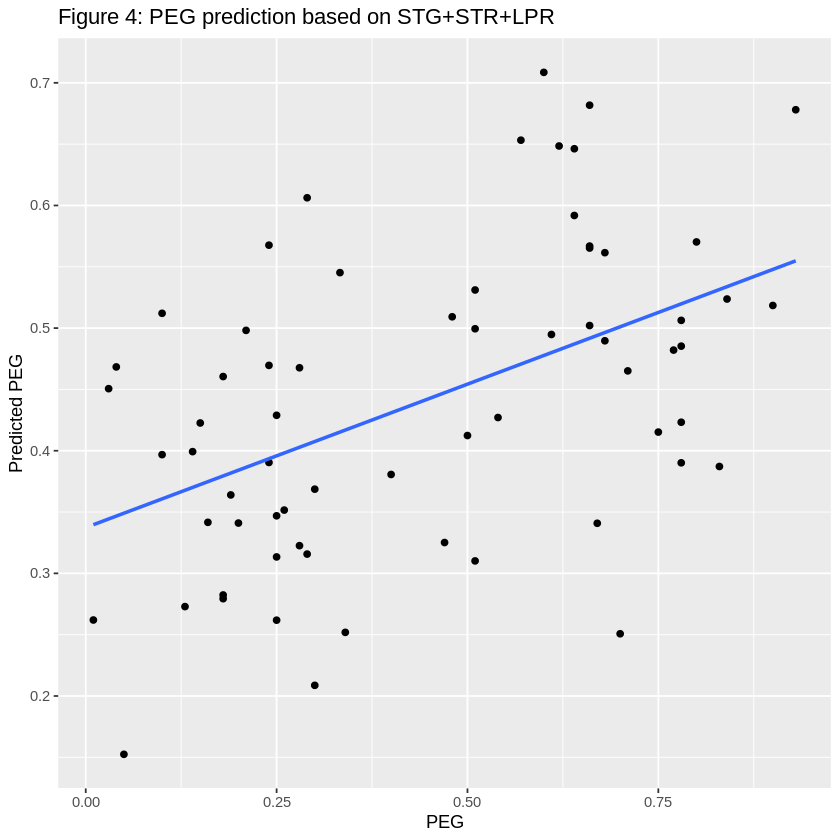

`geom_smooth()` using formula 'y ~ x'



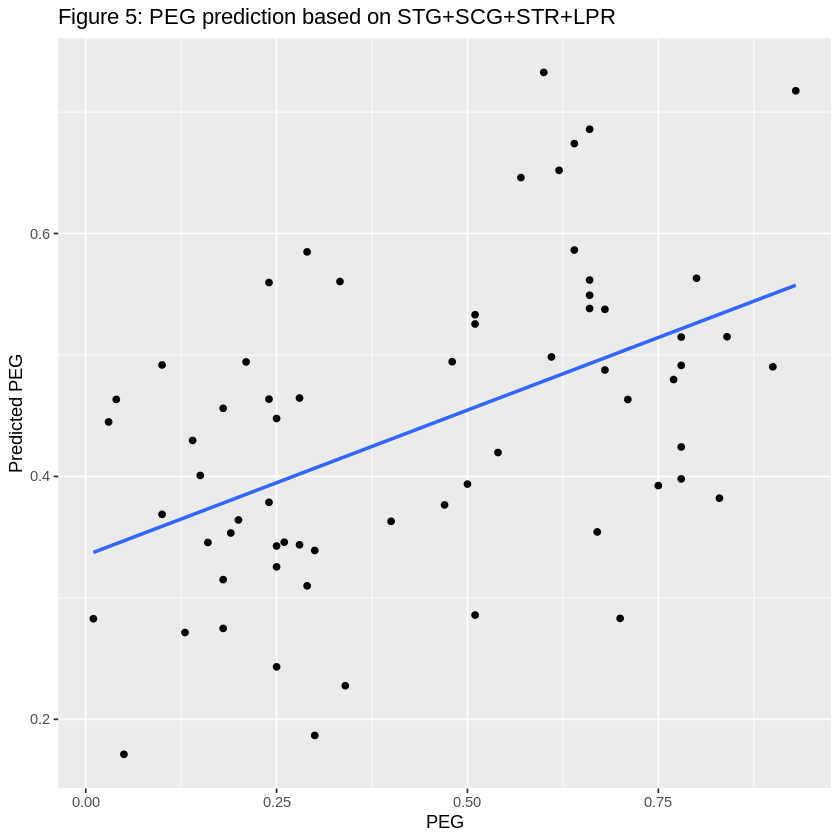

`geom_smooth()` using formula 'y ~ x'



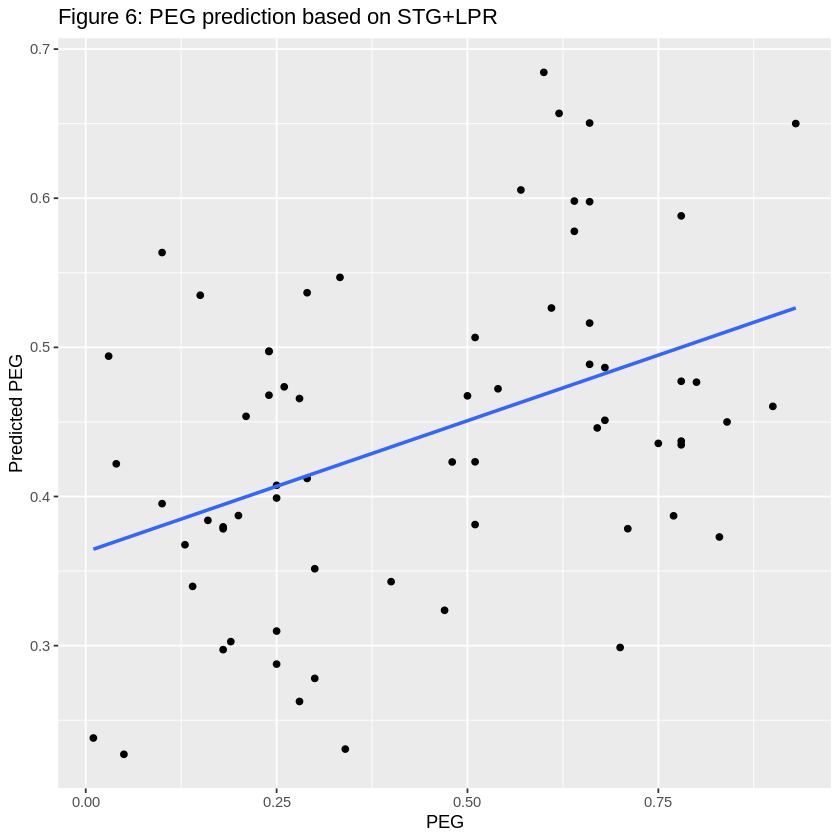

`geom_smooth()` using formula 'y ~ x'



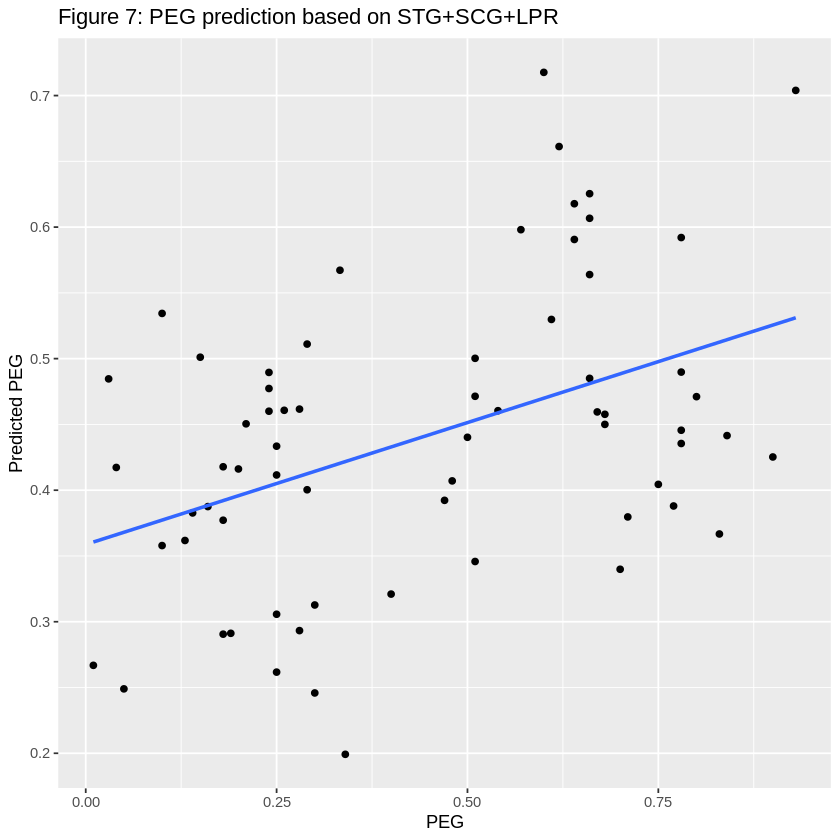

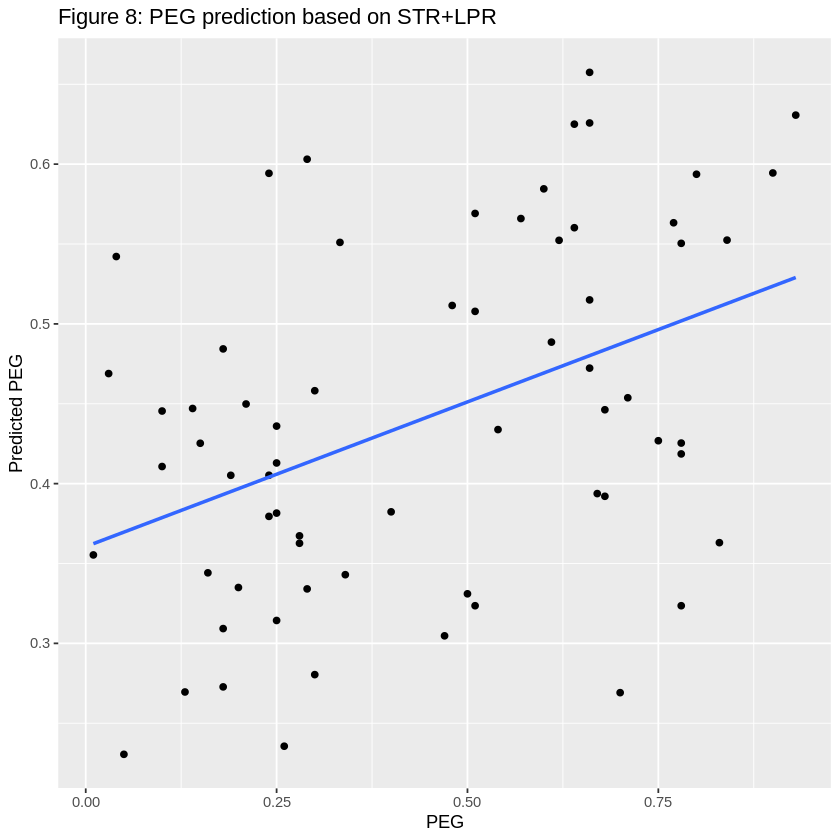

In [36]:
# A plot for the first model                                        
first_lm_recipe <- recipe(PEG ~ STG + STR + LPR, data = data_test)
                                        
first_lm_fit <- workflow() |>
                add_recipe(first_lm_recipe) |>
                add_model(lm_spec) |>
                fit(data = data_test)
                                
                                        
first_plot <- first_lm_fit |>
             predict(data_test) |>
             bind_cols(data_test) |>
             ggplot(aes(x = PEG, y = .pred)) +
             geom_point() +
             geom_smooth(method = "lm", se = FALSE) +
             labs(x = "PEG" , y = "Predicted PEG", title = "Figure 4: PEG prediction based on STG+STR+LPR")

cat("Coefficients for the best model: PEG ~ STG + STR + LPR")
first_lm_fit
first_plot
                                        
                                        
# A plot for the second model                                        
second_lm_recipe <- recipe(PEG ~ STG + SCG + STR + LPR, data = data_test)
                                        
second_lm_fit <- workflow() |>
                add_recipe(second_lm_recipe) |>
                add_model(lm_spec) |>
                fit(data = data_test)
                                
                                        
second_plot <- second_lm_fit |>
             predict(data_test) |>
             bind_cols(data_test) |>
             ggplot(aes(x = PEG, y = .pred)) +
             geom_point() +
             geom_smooth(method = "lm", se = FALSE) +
             labs(x = "PEG" , y = "Predicted PEG", title = "Figure 5: PEG prediction based on STG+SCG+STR+LPR")
                                        
second_plot

# A plot for the thrid model                                        
third_lm_recipe <- recipe(PEG ~ STG + LPR, data = data_test)
                                        
third_lm_fit <- workflow() |>
                add_recipe(third_lm_recipe) |>
                add_model(lm_spec) |>
                fit(data = data_test)
                                
                                        
third_plot <- third_lm_fit |>
             predict(data_test) |>
             bind_cols(data_test) |>
             ggplot(aes(x = PEG, y = .pred)) +
             geom_point() +
             geom_smooth(method = "lm", se = FALSE) +
             labs(x = "PEG" , y = "Predicted PEG", title = "Figure 6: PEG prediction based on STG+LPR")
                         
third_plot
                                        
                                        
# A plot for the fourth model                                        
fourth_lm_recipe <- recipe(PEG ~ STG + SCG + LPR, data = data_test)
                                        
fourth_lm_fit <- workflow() |>
                add_recipe(fourth_lm_recipe) |>
                add_model(lm_spec) |>
                fit(data = data_test)
                                
                                        
fourth_plot <- fourth_lm_fit |>
             predict(data_test) |>
             bind_cols(data_test) |>
             ggplot(aes(x = PEG, y = .pred)) +
             geom_point() +
             geom_smooth(method = "lm", se = FALSE) +
             labs(x = "PEG" , y = "Predicted PEG", title = "Figure 7: PEG prediction based on STG+SCG+LPR")
                                        
fourth_plot

# A plot for the fifth model                                        
fifth_lm_recipe <- recipe(PEG ~ STR + LPR, data = data_test)
                                        
fifth_lm_fit <- workflow() |>
                add_recipe(fifth_lm_recipe) |>
                add_model(lm_spec) |>
                fit(data = data_test)
                                
                                        
fifth_plot <- fifth_lm_fit |>
             predict(data_test) |>
             bind_cols(data_test) |>
             ggplot(aes(x = PEG, y = .pred)) +
             geom_point() +
             geom_smooth(method = "lm", se = FALSE) +
             labs(x = "PEG" , y = "Predicted PEG", title = "Figure 8: PEG prediction based on STR+LPR")
                                        
fifth_plot

We have selected the top 5 combinations of variables used in creating the different models that yield the lowest $RMSE$ value relative to the testing portion of the training set. The scatterplots represent the relationship between the predicted $PEG$ against actual $PEG$ values in the testing portion of the training set. The lines are the best fit lines for each respective models. The ideal model would yield a line aligned with $y = x$, representing predicted values being exactly equal with actual values.

$\text{PEG} = 0.3731 + 0.2968 \cdot \text{STG} + 0.2412 \cdot \text{STR} - 0.3542 \cdot \text{LPR}$

#### **Classification using KNN**
The KNN algorithm operates on the principle of similarity, presuming that similar data points are more likely to belong to the same class. By employing a distance function, KNN identifies a data point's nearest neighbors in the feature space, and assigns the class most common among these neighbors to the new data point.

Our objective is to achieve an efficient and effective classification of the UNS class by carefully tuning the parameters of the KNN algorithm, specifically the 'k' value which determines the number of neighbors to consider. To this end, we will compute various classification metrics, with a particular emphasis on accuracy, which indicates the proportion of correct predictions made by our model.

To commence, our k-Nearest Neighbors (KNN) analysis process involves generating a power set from the set of predictors, explicitly excluding the null set. This strategic exclusion is instrumental in facilitating the creation of every conceivable combination of strings that stem from the original predictor name set. This comprehensive array of combinations, in turn, expands our analysis' dimensions and significantly enriches the depth of our investigation.

Following the generation of the power set, we initiate a cross-validation process. This particular step involves employing a 5-fold method and exploring k values within the range of 1 to 50 in increments of 5. By methodically traversing through this range, we manage to map and quantify the accuracy of each predictor subset. The resulting values are meticulously compiled and stored within a data structure known as a tibble. This structured repository facilitates easy access to and management of our complex, multidimensional data.

Post cross-validation, we execute a sorting operation on our tibble. This sorting action sequences our subsets based on their accuracy, thereby providing an analytical hierarchy of our models. Consequently, we gain the ability to identify the top 10 performing models based on their individual accuracy values.

In [37]:
# Set seed for reproducibility
set.seed(9999)

# Split the data
data_split <- initial_split(data, prop = 0.75, strata = UNS)
data_train <- training(data_split)
data_test <- testing(data_split)

# Define names of the predictors
predictor_names <- c("STG", "SCG", "STR", "LPR", "PEG")

# Create an empty tibble to store the results
results <- tibble(model_string = character(), best_accuracy = numeric())

# Create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Create a 10-fold cross-validation object
data_vfold <- vfold_cv(data_train, v = 5, strata = UNS)

# Generate power set of predictors excluding the empty set
# Credit to https://stackoverflow.com/questions/18715580/algorithm-to-calculate-power-set-all-possible-subsets-of-a-set-in-r
predictor_combinations <- unlist(lapply(seq_along(predictor_names), function(x) combn(predictor_names, x, simplify = FALSE)), recursive = FALSE)

# For every combination of predictors
for (predictors in predictor_combinations) {
  # Create a model string for this combination of predictors
  model_string <- paste("UNS", "~", paste(predictors, collapse="+"))

  # Create a recipe from the model string
  data_recipe <- recipe(as.formula(model_string), data = data_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

  # Tune the KNN classifier with these predictors
  tuning_results <- workflow() |>
    add_recipe(data_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = data_vfold, grid = seq(from = 1, to = 50, by = 5)) |>
    collect_metrics()

  best_k_and_accuracy <- tuning_results |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  slice(1)
  # convert to integer
best_accuracy <- best_k_and_accuracy$mean[1]

# Add these results to the dataframe
results <- results |> add_row(model_string = model_string, best_accuracy = best_accuracy)
}

# Sort the results by accuracy in descending order
results <- results |> arrange(desc(best_accuracy))

# Print the sorted results
cat("Table 5: Classification Model Performance\n")
print(results)

# A tibble: 31 × 2
   model_string          best_accuracy
   <chr>                         <dbl>
 1 UNS ~ LPR+PEG                 0.937
 2 UNS ~ STR+LPR+PEG             0.895
 3 UNS ~ SCG+LPR+PEG             0.870
 4 UNS ~ STG+LPR+PEG             0.848
 5 UNS ~ STR+PEG                 0.838
 6 UNS ~ SCG+PEG                 0.833
 7 UNS ~ STG+PEG                 0.823
 8 UNS ~ STG+STR+LPR+PEG         0.802
 9 UNS ~ STG+SCG+LPR+PEG         0.801
10 UNS ~ SCG+STR+PEG             0.791
# … with 21 more rows


Upon identifying our top-performing models, we delve deeper into their dynamics through a secondary cross-validation process. Here, we increase our fold parameter to 10 and assess the k values within a range of 1 to 20. Notably, for one of the models, we extend our k value range up to 30. This systematic yet varied approach allows us to optimize the performance accuracy of each model, thus enabling us to discern the model that delivers the highest accuracy.

! Fold07: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.

! Fold10: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.



# A tibble: 20 × 7
   neighbors .metric  .estimator  mean     n std_err .config              
       <dbl> <chr>    <chr>      <dbl> <int>   <dbl> <chr>                
 1         1 accuracy multiclass 0.931    10  0.0184 Preprocessor1_Model01
 2         2 accuracy multiclass 0.931    10  0.0184 Preprocessor1_Model02
 3         3 accuracy multiclass 0.943    10  0.0122 Preprocessor1_Model03
 4         4 accuracy multiclass 0.943    10  0.0122 Preprocessor1_Model04
 5         5 accuracy multiclass 0.943    10  0.0165 Preprocessor1_Model05
 6         6 accuracy multiclass 0.943    10  0.0165 Preprocessor1_Model06
 7         7 accuracy multiclass 0.942    10  0.0213 Preprocessor1_Model07
 8         8 accuracy multiclass 0.942    10  0.0213 Preprocessor1_Model08
 9         9 accuracy multiclass 0.927    10  0.0197 Preprocessor1_Model09
10        10 accuracy multiclass 0.927    10  0.0197 Preprocessor1_Model10
11        11 accuracy multiclass 0.911    10  0.0178 Preprocessor1_Model11
12    

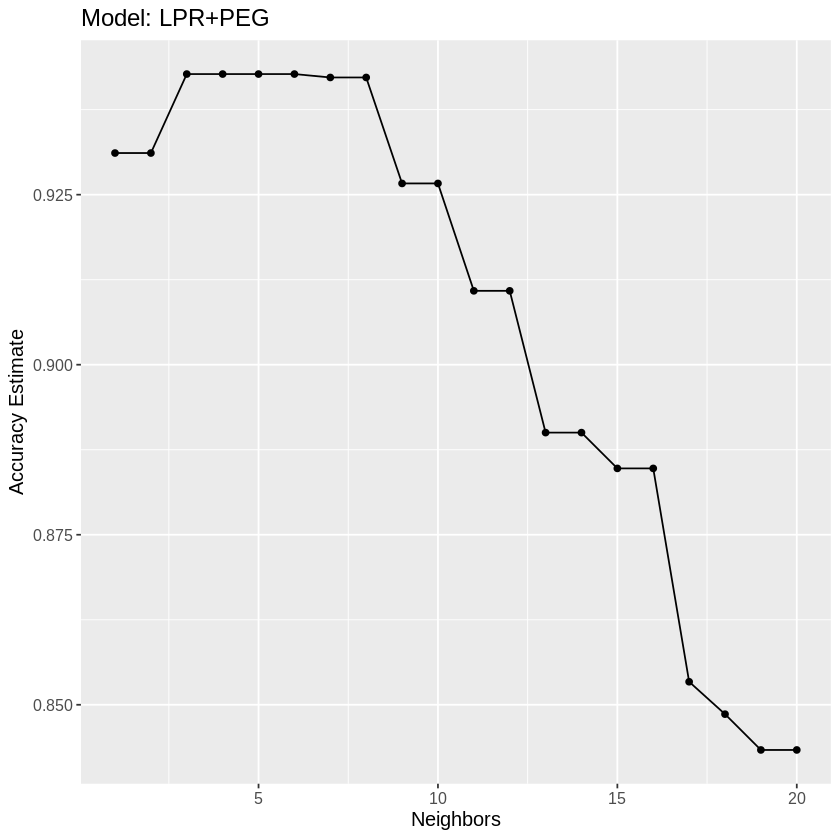

In [11]:
# Model LPR+PEG
# Set seed for reproducibility
set.seed(9999)

# Define the first model
model_string <- "LPR+PEG"

# Create a formula for this model
model_formula <- as.formula(paste("UNS ~", model_string))

# Create a recipe from the model formula
data_recipe <- recipe(model_formula, data = data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Define a KNN model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Create a 10-fold cross-validation object
data_vfold <- vfold_cv(data_train, v = 10, strata = UNS)

# Define a grid of K values
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

# Tune the KNN model with this recipe
knn_results <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = data_vfold, grid = k_vals) |>
  collect_metrics()

# Filter the results for accuracy
accuracies <- knn_results |>
  filter(.metric == "accuracy")

acc_pr <- accuracies |>
  arrange(neighbors)
cat("Table 6: Classification Model(LPR+PEG) Performance\n")
print(acc_pr, n = 20)

# Find the K value with the highest mean accuracy
best_accuracy <- accuracies |>
  arrange(desc(mean)) |>
  slice(1)

# Print the best K value and accuracy
print(paste("Model:", model_string))
print(paste("Best K:", best_accuracy$neighbors))
print(paste("Best accuracy:", best_accuracy$mean))

# Create a plot of accuracy vs K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",
       title = paste("Figure 9: Model:", model_string)) +
  theme(text = element_text(size = 12))

# Print the plot
print(accuracy_vs_k)

! Fold07: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.

! Fold10: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.



# A tibble: 20 × 7
   neighbors .metric  .estimator  mean     n std_err .config              
       <dbl> <chr>    <chr>      <dbl> <int>   <dbl> <chr>                
 1         1 accuracy multiclass 0.890    10  0.0171 Preprocessor1_Model01
 2         2 accuracy multiclass 0.890    10  0.0171 Preprocessor1_Model02
 3         3 accuracy multiclass 0.897    10  0.0214 Preprocessor1_Model03
 4         4 accuracy multiclass 0.897    10  0.0214 Preprocessor1_Model04
 5         5 accuracy multiclass 0.885    10  0.0169 Preprocessor1_Model05
 6         6 accuracy multiclass 0.885    10  0.0169 Preprocessor1_Model06
 7         7 accuracy multiclass 0.870    10  0.0206 Preprocessor1_Model07
 8         8 accuracy multiclass 0.870    10  0.0206 Preprocessor1_Model08
 9         9 accuracy multiclass 0.864    10  0.0239 Preprocessor1_Model09
10        10 accuracy multiclass 0.859    10  0.0224 Preprocessor1_Model10
11        11 accuracy multiclass 0.859    10  0.0224 Preprocessor1_Model11
12    

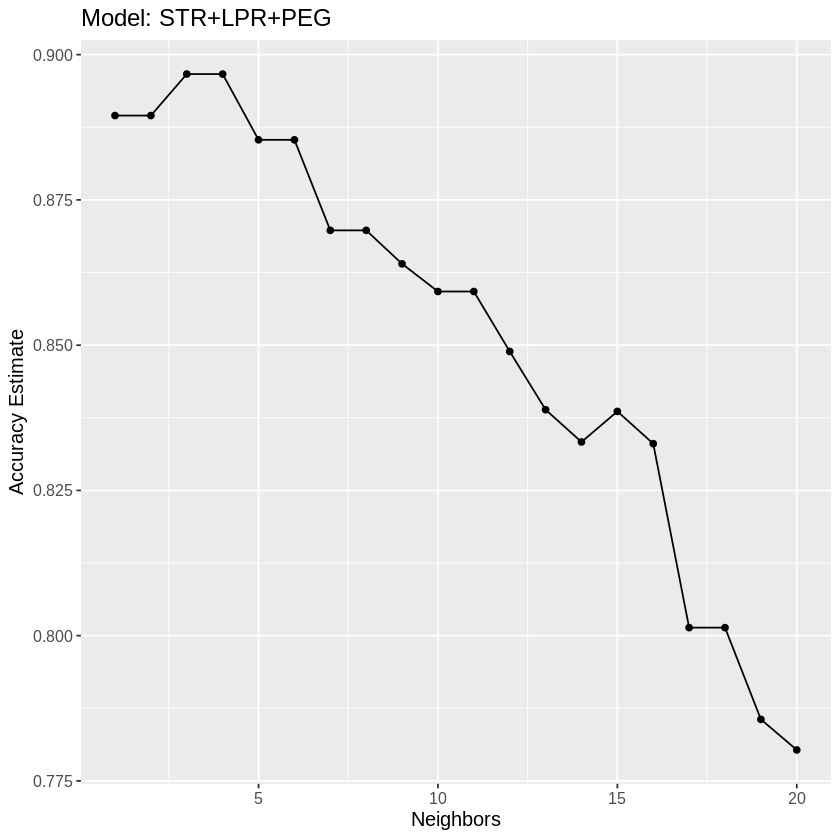

In [12]:
# Model STR+LPR+PEG
# Set seed for reproducibility
set.seed(9999)

# Define the first model
model_string <- "STR+LPR+PEG"

# Create a formula for this model
model_formula <- as.formula(paste("UNS ~", model_string))

# Create a recipe from the model formula
data_recipe <- recipe(model_formula, data = data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Tune the KNN model with this recipe
knn_results <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = data_vfold, grid = k_vals) |>
  collect_metrics()

# Filter the results for accuracy
accuracies <- knn_results |>
  filter(.metric == "accuracy")

acc_pr <- accuracies |>
  arrange(neighbors)
cat("Table 7: Classification Model(STR+LPR+PEG) Performance\n")
print(acc_pr, n = 20)

# Find the K value with the highest mean accuracy
best_accuracy <- accuracies |>
  arrange(desc(mean)) |>
  slice(1)

# Print the best K value and accuracy
print(paste("Model:", model_string))
print(paste("Best K:", best_accuracy$neighbors))
print(paste("Best accuracy:", best_accuracy$mean))

# Create a plot of accuracy vs K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",
       title = paste("Figure 10: Model:", model_string)) +
  theme(text = element_text(size = 12))

# Print the plot
print(accuracy_vs_k)

! Fold07: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.

! Fold10: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.



# A tibble: 20 × 7
   neighbors .metric  .estimator  mean     n std_err .config              
       <dbl> <chr>    <chr>      <dbl> <int>   <dbl> <chr>                
 1         1 accuracy multiclass 0.916    10  0.0201 Preprocessor1_Model01
 2         2 accuracy multiclass 0.916    10  0.0201 Preprocessor1_Model02
 3         3 accuracy multiclass 0.931    10  0.0213 Preprocessor1_Model03
 4         4 accuracy multiclass 0.931    10  0.0213 Preprocessor1_Model04
 5         5 accuracy multiclass 0.900    10  0.0246 Preprocessor1_Model05
 6         6 accuracy multiclass 0.900    10  0.0246 Preprocessor1_Model06
 7         7 accuracy multiclass 0.864    10  0.0299 Preprocessor1_Model07
 8         8 accuracy multiclass 0.864    10  0.0299 Preprocessor1_Model08
 9         9 accuracy multiclass 0.875    10  0.0276 Preprocessor1_Model09
10        10 accuracy multiclass 0.880    10  0.0238 Preprocessor1_Model10
11        11 accuracy multiclass 0.859    10  0.0248 Preprocessor1_Model11
12    

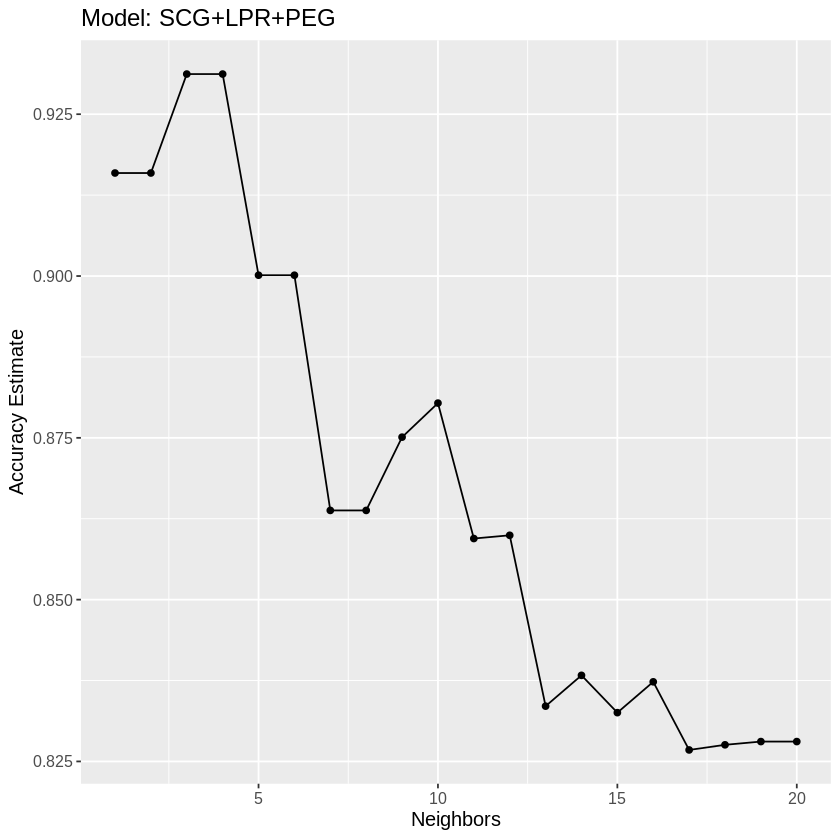

In [13]:
# Model SCG+LPR+PEG
# Set seed for reproducibility
set.seed(9999)

# Define the first model
model_string <- "SCG+LPR+PEG"

# Create a formula for this model
model_formula <- as.formula(paste("UNS ~", model_string))

# Create a recipe from the model formula
data_recipe <- recipe(model_formula, data = data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())


# Tune the KNN model with this recipe
knn_results <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = data_vfold, grid = k_vals) |>
  collect_metrics()

# Filter the results for accuracy
accuracies <- knn_results |>
  filter(.metric == "accuracy")

acc_pr <- accuracies |>
  arrange(neighbors)
cat("Table 8: Classification Model(SCG+LPR+PEG) Performance\n")
print(acc_pr, n = 20)

# Find the K value with the highest mean accuracy
best_accuracy <- accuracies |>
  arrange(desc(mean)) |>
  slice(1)

# Print the best K value and accuracy
print(paste("Model:", model_string))
print(paste("Best K:", best_accuracy$neighbors))
print(paste("Best accuracy:", best_accuracy$mean))

# Create a plot of accuracy vs K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",
       title = paste("Figure 11: Model:", model_string)) +
  theme(text = element_text(size = 12))

# Print the plot
print(accuracy_vs_k)

! Fold07: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.

! Fold10: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.



# A tibble: 20 × 7
   neighbors .metric  .estimator  mean     n std_err .config              
       <dbl> <chr>    <chr>      <dbl> <int>   <dbl> <chr>                
 1         1 accuracy multiclass 0.926    10  0.0166 Preprocessor1_Model01
 2         2 accuracy multiclass 0.926    10  0.0166 Preprocessor1_Model02
 3         3 accuracy multiclass 0.932    10  0.0228 Preprocessor1_Model03
 4         4 accuracy multiclass 0.932    10  0.0228 Preprocessor1_Model04
 5         5 accuracy multiclass 0.896    10  0.0242 Preprocessor1_Model05
 6         6 accuracy multiclass 0.885    10  0.0227 Preprocessor1_Model06
 7         7 accuracy multiclass 0.869    10  0.0365 Preprocessor1_Model07
 8         8 accuracy multiclass 0.869    10  0.0365 Preprocessor1_Model08
 9         9 accuracy multiclass 0.863    10  0.0294 Preprocessor1_Model09
10        10 accuracy multiclass 0.858    10  0.0282 Preprocessor1_Model10
11        11 accuracy multiclass 0.838    10  0.0261 Preprocessor1_Model11
12    

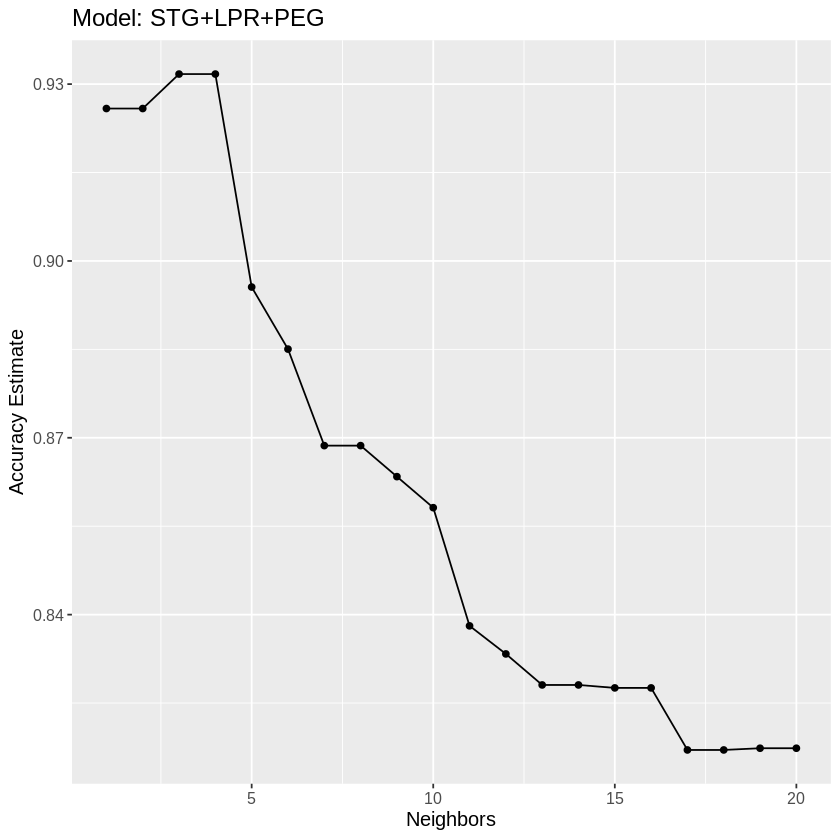

In [14]:
# Model STG+LPR+PEG
# Set seed for reproducibility
set.seed(9999)

# Define the first model
model_string <- "STG+LPR+PEG"

# Create a formula for this model
model_formula <- as.formula(paste("UNS ~", model_string))

# Create a recipe from the model formula
data_recipe <- recipe(model_formula, data = data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Tune the KNN model with this recipe
knn_results <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = data_vfold, grid = k_vals) |>
  collect_metrics()

# Filter the results for accuracy
accuracies <- knn_results |>
  filter(.metric == "accuracy")

acc_pr <- accuracies |>
  arrange(neighbors)
cat("Table 9: Classification Model(STG+LPR+PEG) Performance\n")
print(acc_pr, n = 20)

# Find the K value with the highest mean accuracy
best_accuracy <- accuracies |>
  arrange(desc(mean)) |>
  slice(1)

# Print the best K value and accuracy
print(paste("Model:", model_string))
print(paste("Best K:", best_accuracy$neighbors))
print(paste("Best accuracy:", best_accuracy$mean))

# Create a plot of accuracy vs K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",
       title = paste("Figure 12: Model:", model_string)) +
  theme(text = element_text(size = 12))

# Print the plot
print(accuracy_vs_k)

! Fold07: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.

! Fold10: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.



# A tibble: 30 × 7
   neighbors .metric  .estimator  mean     n std_err .config              
       <dbl> <chr>    <chr>      <dbl> <int>   <dbl> <chr>                
 1         1 accuracy multiclass 0.745    10  0.0335 Preprocessor1_Model01
 2         2 accuracy multiclass 0.750    10  0.0338 Preprocessor1_Model02
 3         3 accuracy multiclass 0.766    10  0.0221 Preprocessor1_Model03
 4         4 accuracy multiclass 0.766    10  0.0221 Preprocessor1_Model04
 5         5 accuracy multiclass 0.818    10  0.0206 Preprocessor1_Model05
 6         6 accuracy multiclass 0.818    10  0.0206 Preprocessor1_Model06
 7         7 accuracy multiclass 0.829    10  0.0332 Preprocessor1_Model07
 8         8 accuracy multiclass 0.829    10  0.0332 Preprocessor1_Model08
 9         9 accuracy multiclass 0.828    10  0.0335 Preprocessor1_Model09
10        10 accuracy multiclass 0.828    10  0.0335 Preprocessor1_Model10
11        11 accuracy multiclass 0.819    10  0.0340 Preprocessor1_Model11
12    

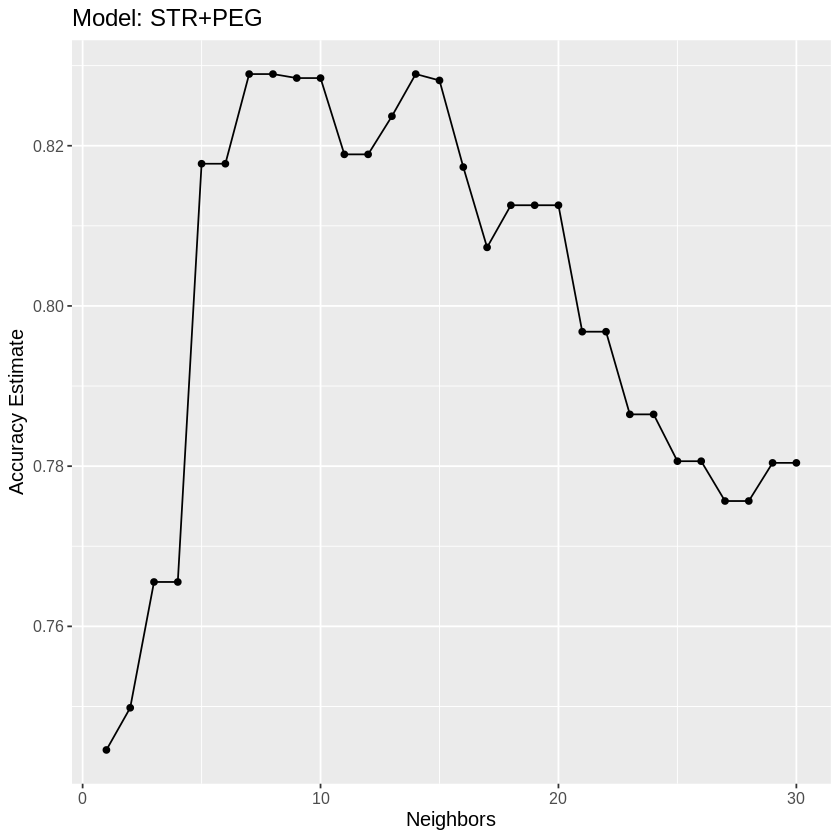

In [15]:
# Model STR+PEG
# Set seed for reproducibility
set.seed(9999)

# Define the first model
model_string <- "STR+PEG"

# Create a formula for this model
model_formula <- as.formula(paste("UNS ~", model_string))

# Create a recipe from the model formula
data_recipe <- recipe(model_formula, data = data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Define a grid of K values
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

# Tune the KNN model with this recipe
knn_results <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = data_vfold, grid = k_vals) |>
  collect_metrics()

# Filter the results for accuracy
accuracies <- knn_results |>
  filter(.metric == "accuracy")

acc_pr <- accuracies |>
  arrange(neighbors)
cat("Table 10: Classification Model(STR+PEG) Performance\n")
print(acc_pr, n = 20)

# Find the K value with the highest mean accuracy
best_accuracy <- accuracies |>
  arrange(desc(mean)) |>
  slice(1)

# Print the best K value and accuracy
print(paste("Model:", model_string))
print(paste("Best K:", best_accuracy$neighbors))
print(paste("Best accuracy:", best_accuracy$mean))

# Create a plot of accuracy vs K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",
       title = paste("Figure 13: Model:", model_string)) +
  theme(text = element_text(size = 12))

# Print the plot
print(accuracy_vs_k)

! Fold07: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.

! Fold10: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.



# A tibble: 20 × 7
   neighbors .metric  .estimator  mean     n std_err .config              
       <dbl> <chr>    <chr>      <dbl> <int>   <dbl> <chr>                
 1         1 accuracy multiclass 0.771    10  0.0275 Preprocessor1_Model01
 2         2 accuracy multiclass 0.771    10  0.0275 Preprocessor1_Model02
 3         3 accuracy multiclass 0.772    10  0.0260 Preprocessor1_Model03
 4         4 accuracy multiclass 0.778    10  0.0257 Preprocessor1_Model04
 5         5 accuracy multiclass 0.805    10  0.0330 Preprocessor1_Model05
 6         6 accuracy multiclass 0.805    10  0.0330 Preprocessor1_Model06
 7         7 accuracy multiclass 0.798    10  0.0366 Preprocessor1_Model07
 8         8 accuracy multiclass 0.793    10  0.0354 Preprocessor1_Model08
 9         9 accuracy multiclass 0.809    10  0.0345 Preprocessor1_Model09
10        10 accuracy multiclass 0.809    10  0.0345 Preprocessor1_Model10
11        11 accuracy multiclass 0.815    10  0.0371 Preprocessor1_Model11
12    

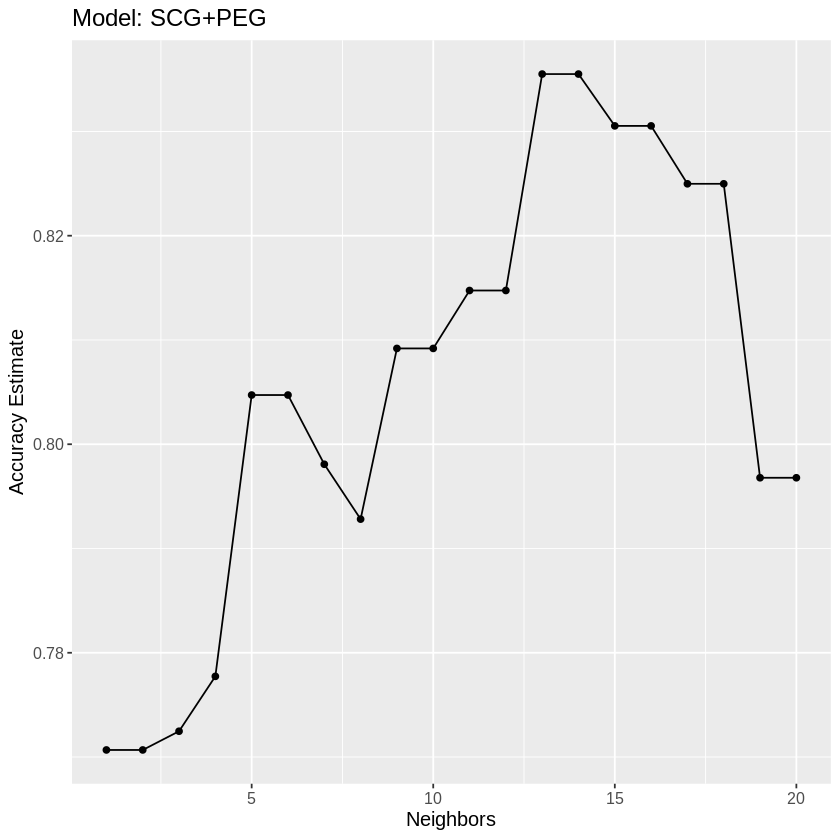

In [16]:
# Model SCG+PEG
# Set seed for reproducibility
set.seed(9999)

# Define the first model
model_string <- "SCG+PEG"

# Create a formula for this model
model_formula <- as.formula(paste("UNS ~", model_string))

# Create a recipe from the model formula
data_recipe <- recipe(model_formula, data = data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Define a grid of K values
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

# Tune the KNN model with this recipe
knn_results <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = data_vfold, grid = k_vals) |>
  collect_metrics()

# Filter the results for accuracy
accuracies <- knn_results |>
  filter(.metric == "accuracy")

acc_pr <- accuracies |>
  arrange(neighbors)
cat("Table 11: Classification Model(SCG+PEG) Performance\n")
print(acc_pr, n = 20)

# Find the K value with the highest mean accuracy
best_accuracy <- accuracies |>
  arrange(desc(mean)) |>
  slice(1)

# Print the best K value and accuracy
print(paste("Model:", model_string))
print(paste("Best K:", best_accuracy$neighbors))
print(paste("Best accuracy:", best_accuracy$mean))

# Create a plot of accuracy vs K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",
       title = paste("Figure 14: Model:", model_string)) +
  theme(text = element_text(size = 12))

# Print the plot
print(accuracy_vs_k)

! Fold07: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.

! Fold10: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.



# A tibble: 20 × 7
   neighbors .metric  .estimator  mean     n std_err .config              
       <dbl> <chr>    <chr>      <dbl> <int>   <dbl> <chr>                
 1         1 accuracy multiclass 0.783    10  0.0237 Preprocessor1_Model01
 2         2 accuracy multiclass 0.778    10  0.0256 Preprocessor1_Model02
 3         3 accuracy multiclass 0.809    10  0.0273 Preprocessor1_Model03
 4         4 accuracy multiclass 0.809    10  0.0273 Preprocessor1_Model04
 5         5 accuracy multiclass 0.794    10  0.0381 Preprocessor1_Model05
 6         6 accuracy multiclass 0.794    10  0.0381 Preprocessor1_Model06
 7         7 accuracy multiclass 0.771    10  0.0406 Preprocessor1_Model07
 8         8 accuracy multiclass 0.766    10  0.0399 Preprocessor1_Model08
 9         9 accuracy multiclass 0.788    10  0.0350 Preprocessor1_Model09
10        10 accuracy multiclass 0.793    10  0.0342 Preprocessor1_Model10
11        11 accuracy multiclass 0.782    10  0.0301 Preprocessor1_Model11
12    

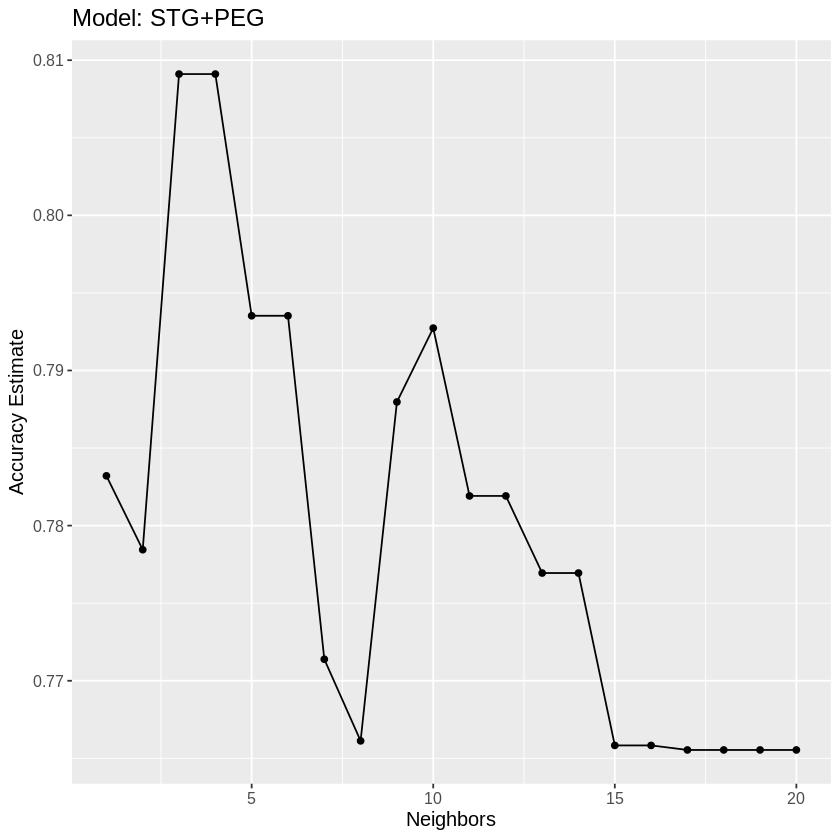

In [17]:
# Model STG+PEG
# Set seed for reproducibility
set.seed(9999)

# Define the first model
model_string <- "STG+PEG"

# Create a formula for this model
model_formula <- as.formula(paste("UNS ~", model_string))

# Create a recipe from the model formula
data_recipe <- recipe(model_formula, data = data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Tune the KNN model with this recipe
knn_results <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = data_vfold, grid = k_vals) |>
  collect_metrics()

# Filter the results for accuracy
accuracies <- knn_results |>
  filter(.metric == "accuracy")

acc_pr <- accuracies |>
  arrange(neighbors)
cat("Table 12: Classification Model(STG+PEG) Performance\n")
print(acc_pr, n = 20)

# Find the K value with the highest mean accuracy
best_accuracy <- accuracies |>
  arrange(desc(mean)) |>
  slice(1)

# Print the best K value and accuracy
print(paste("Model:", model_string))
print(paste("Best K:", best_accuracy$neighbors))
print(paste("Best accuracy:", best_accuracy$mean))

# Create a plot of accuracy vs K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",
       title = paste("Figure 15: Model:", model_string)) +
  theme(text = element_text(size = 12))

# Print the plot
print(accuracy_vs_k)

! Fold07: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.

! Fold10: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.



# A tibble: 20 × 7
   neighbors .metric  .estimator  mean     n std_err .config              
       <dbl> <chr>    <chr>      <dbl> <int>   <dbl> <chr>                
 1         1 accuracy multiclass 0.870    10  0.0259 Preprocessor1_Model01
 2         2 accuracy multiclass 0.870    10  0.0259 Preprocessor1_Model02
 3         3 accuracy multiclass 0.880    10  0.0197 Preprocessor1_Model03
 4         4 accuracy multiclass 0.880    10  0.0202 Preprocessor1_Model04
 5         5 accuracy multiclass 0.880    10  0.0267 Preprocessor1_Model05
 6         6 accuracy multiclass 0.869    10  0.0246 Preprocessor1_Model06
 7         7 accuracy multiclass 0.823    10  0.0179 Preprocessor1_Model07
 8         8 accuracy multiclass 0.822    10  0.0197 Preprocessor1_Model08
 9         9 accuracy multiclass 0.818    10  0.0206 Preprocessor1_Model09
10        10 accuracy multiclass 0.822    10  0.0213 Preprocessor1_Model10
11        11 accuracy multiclass 0.791    10  0.0192 Preprocessor1_Model11
12    

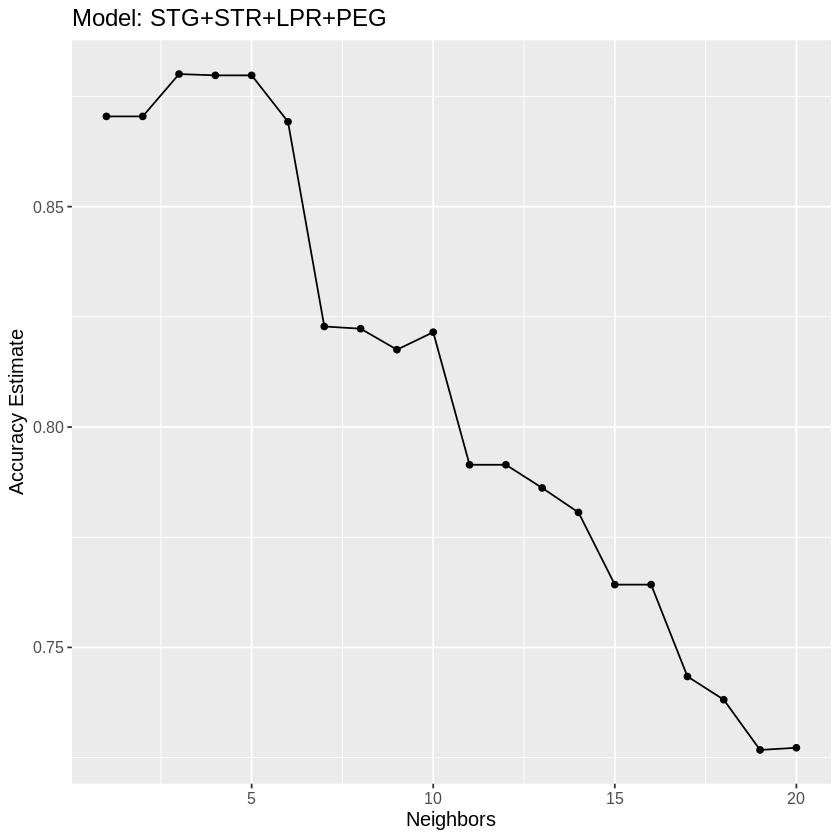

In [18]:
# Model STG+STR+LPR+PEG
# Set seed for reproducibility
set.seed(9999)

# Define the first model
model_string <- "STG+STR+LPR+PEG"

# Create a formula for this model
model_formula <- as.formula(paste("UNS ~", model_string))

# Create a recipe from the model formula
data_recipe <- recipe(model_formula, data = data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Tune the KNN model with this recipe
knn_results <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = data_vfold, grid = k_vals) |>
  collect_metrics()

# Filter the results for accuracy
accuracies <- knn_results |>
  filter(.metric == "accuracy")

acc_pr <- accuracies |>
  arrange(neighbors)
cat("Table 13: Classification Model(STG+STR+LPR+PEG) Performance\n")
print(acc_pr, n = 20)

# Find the K value with the highest mean accuracy
best_accuracy <- accuracies |>
  arrange(desc(mean)) |>
  slice(1)

# Print the best K value and accuracy
print(paste("Model:", model_string))
print(paste("Best K:", best_accuracy$neighbors))
print(paste("Best accuracy:", best_accuracy$mean))

# Create a plot of accuracy vs K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",
       title = paste("Figure 16: Model:", model_string)) +
  theme(text = element_text(size = 12))

# Print the plot
print(accuracy_vs_k)

! Fold07: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.

! Fold10: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.



# A tibble: 20 × 7
   neighbors .metric  .estimator  mean     n std_err .config              
       <dbl> <chr>    <chr>      <dbl> <int>   <dbl> <chr>                
 1         1 accuracy multiclass 0.901    10  0.0240 Preprocessor1_Model01
 2         2 accuracy multiclass 0.901    10  0.0240 Preprocessor1_Model02
 3         3 accuracy multiclass 0.864    10  0.0230 Preprocessor1_Model03
 4         4 accuracy multiclass 0.869    10  0.0263 Preprocessor1_Model04
 5         5 accuracy multiclass 0.849    10  0.0257 Preprocessor1_Model05
 6         6 accuracy multiclass 0.844    10  0.0252 Preprocessor1_Model06
 7         7 accuracy multiclass 0.812    10  0.0272 Preprocessor1_Model07
 8         8 accuracy multiclass 0.823    10  0.0283 Preprocessor1_Model08
 9         9 accuracy multiclass 0.808    10  0.0288 Preprocessor1_Model09
10        10 accuracy multiclass 0.802    10  0.0267 Preprocessor1_Model10
11        11 accuracy multiclass 0.786    10  0.0240 Preprocessor1_Model11
12    

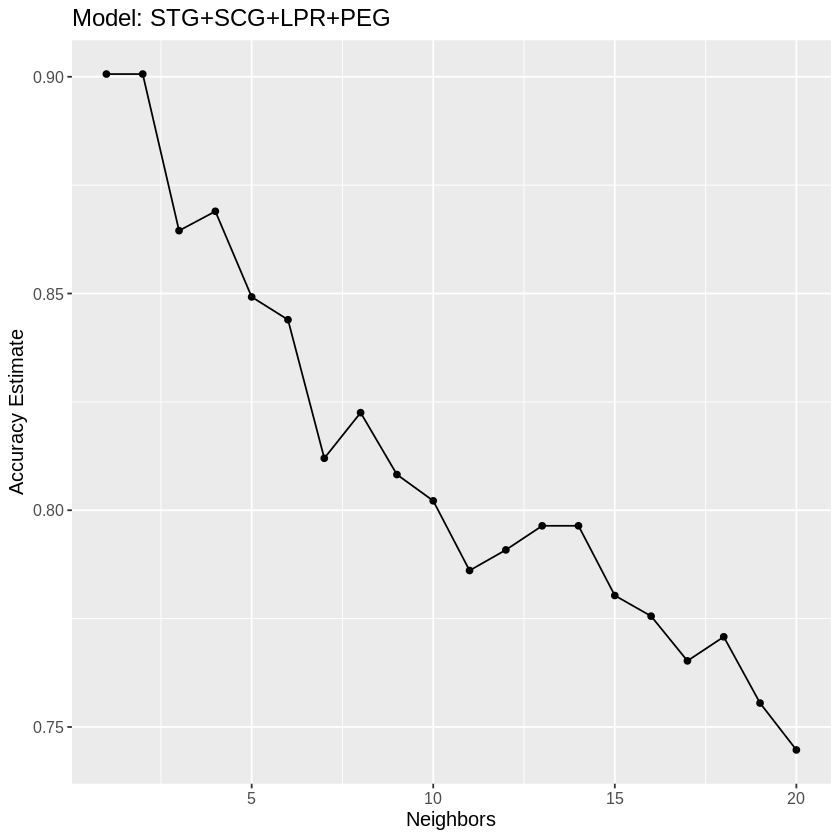

In [19]:
# Model STG+SCG+LPR+PEG
# Set seed for reproducibility
set.seed(9999)

# Define the first model
model_string <- "STG+SCG+LPR+PEG"

# Create a formula for this model
model_formula <- as.formula(paste("UNS ~", model_string))

# Create a recipe from the model formula
data_recipe <- recipe(model_formula, data = data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Tune the KNN model with this recipe
knn_results <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = data_vfold, grid = k_vals) |>
  collect_metrics()

# Filter the results for accuracy
accuracies <- knn_results |>
  filter(.metric == "accuracy")

acc_pr <- accuracies |>
  arrange(neighbors)
cat("Table 14: Classification Model(STG+SCG+LPR+PEG) Performance\n")
print(acc_pr, n = 20)

# Find the K value with the highest mean accuracy
best_accuracy <- accuracies |>
  arrange(desc(mean)) |>
  slice(1)

# Print the best K value and accuracy
print(paste("Model:", model_string))
print(paste("Best K:", best_accuracy$neighbors))
print(paste("Best accuracy:", best_accuracy$mean))

# Create a plot of accuracy vs K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",
       title = paste("Figure 17: Model:", model_string)) +
  theme(text = element_text(size = 12))

# Print the plot
print(accuracy_vs_k)

! Fold07: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.

! Fold10: internal:
  No observations were detected in `truth` for level(s): 'very_low'
  Computation will proceed by ignoring those levels.



# A tibble: 20 × 7
   neighbors .metric  .estimator  mean     n std_err .config              
       <dbl> <chr>    <chr>      <dbl> <int>   <dbl> <chr>                
 1         1 accuracy multiclass 0.714    10  0.0379 Preprocessor1_Model01
 2         2 accuracy multiclass 0.714    10  0.0379 Preprocessor1_Model02
 3         3 accuracy multiclass 0.752    10  0.0385 Preprocessor1_Model03
 4         4 accuracy multiclass 0.752    10  0.0385 Preprocessor1_Model04
 5         5 accuracy multiclass 0.807    10  0.0306 Preprocessor1_Model05
 6         6 accuracy multiclass 0.807    10  0.0306 Preprocessor1_Model06
 7         7 accuracy multiclass 0.797    10  0.0339 Preprocessor1_Model07
 8         8 accuracy multiclass 0.792    10  0.0344 Preprocessor1_Model08
 9         9 accuracy multiclass 0.802    10  0.0306 Preprocessor1_Model09
10        10 accuracy multiclass 0.807    10  0.0309 Preprocessor1_Model10
11        11 accuracy multiclass 0.785    10  0.0345 Preprocessor1_Model11
12    

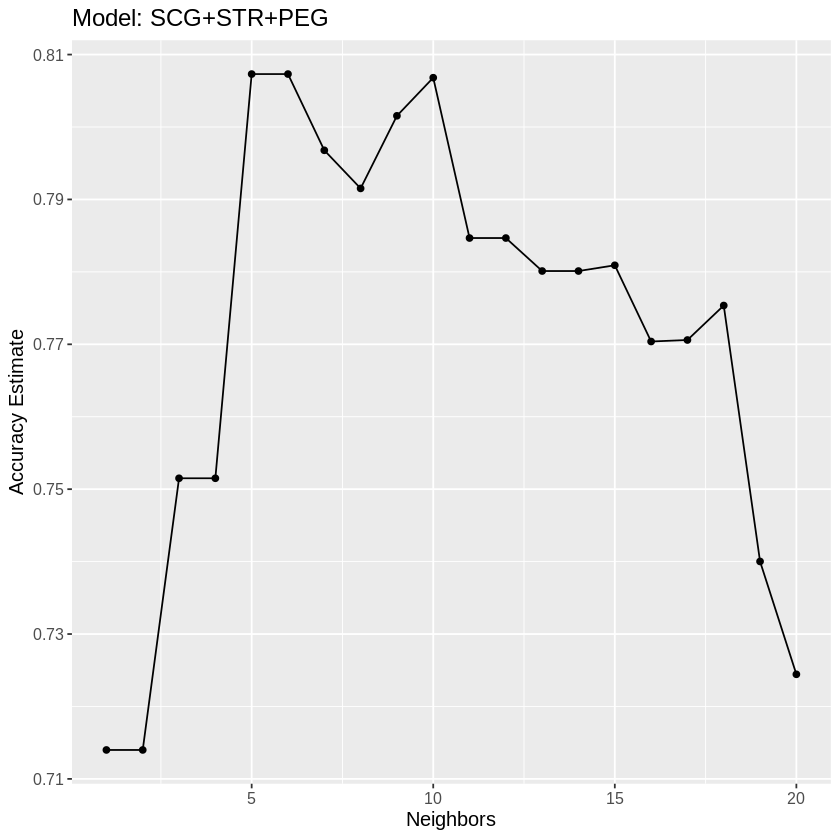

In [20]:
# Model SCG+STR+PEG
# Set seed for reproducibility
set.seed(9999)

# Define the first model
model_string <- "SCG+STR+PEG"

# Create a formula for this model
model_formula <- as.formula(paste("UNS ~", model_string))

# Create a recipe from the model formula
data_recipe <- recipe(model_formula, data = data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Tune the KNN model with this recipe
knn_results <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = data_vfold, grid = k_vals) |>
  collect_metrics()

# Filter the results for accuracy
accuracies <- knn_results |>
  filter(.metric == "accuracy")

acc_pr <- accuracies |>
  arrange(neighbors)
cat("Table 15: Classification Model(SCG+STR+PEG) Performance\n")
print(acc_pr, n = 20)

# Find the K value with the highest mean accuracy
best_accuracy <- accuracies |>
  arrange(desc(mean)) |>
  slice(1)

# Print the best K value and accuracy
print(paste("Model:", model_string))
print(paste("Best K:", best_accuracy$neighbors))
print(paste("Best accuracy:", best_accuracy$mean))

# Create a plot of accuracy vs K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",
       title = paste("Figure 18: Model:", model_string)) +
  theme(text = element_text(size = 12))

# Print the plot
print(accuracy_vs_k)

As per our meticulous analysis and model evaluation process, it has been discerned that the optimal model is defined by the predictor variables, namely, LPR and PEG. This particular model exhibits an exceptional accuracy level of approximately 94%. The associated k-value for this model is five. The selection of k = 5 is deliberate and strategic. Even though a small deviation from this value does not precipitate a significant decrease in accuracy, we prioritize the stability and consistency of our model's performance by minimizing variations in the k-value.

Once our model parameters are definitively identified, we proceed with the model training phase. This phase is fundamental to building a reliable and efficient model. We utilize the designated training set to conduct the model training. This rigorous training process allows the model to learn from the dataset's inherent patterns and relationships and optimizes the model's ability to make accurate predictions.

Subsequently, we move to the testing phase, where the model's predictive power is evaluated against the testing set. This phase is crucial to determine the real-world applicability and effectiveness of our model. It ascertains the extent to which our model can generalize the insights derived from the training phase to unseen data.

To quantify and communicate our model's performance, we utilize two primary methods: general accuracy measurement and confusion matrix metrics. The general accuracy provides an overarching evaluation of the model's prediction success rate. In contrast, the confusion matrix offers a more nuanced understanding of the model's performance by illustrating the instances of true positives, true negatives, false positives, and false negatives.

In addition to the evaluation with the testing set, we further assess our model by applying it to a set of arbitrarily created data. This exercise is an additional validation step that checks our model's robustness and adaptability across diverse data scenarios. The output derived from this exercise enriches our understanding of the model's performance and capability, further solidifying its value and reliability.

In [21]:
set.seed(9999)
# Classification: predicting UNS

data <- data |> 
    mutate(UNS = as.factor(UNS))

# Splitting the data
data_split <- initial_split(data, prop = 0.75, strata = UNS)
data_train <- training(data_split)
data_test <- testing(data_split)
              



# Train data
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
            set_engine("kknn") |>
            set_mode("classification")

data_recipe <- recipe(UNS ~ LPR + PEG, data = data_train) |>
            step_scale(all_predictors()) |>
            step_center(all_predictors())


data_fit <- workflow() |>
            add_model(knn_spec) |>
            add_recipe(data_recipe) |>
            fit(data = data_train)



# Predict the class labels for our test set
data_test_predictions <- predict(data_fit, data_test) |> bind_cols(data_test)

# Compute the classifier's accuracy
data_test_prediction_accuracy <- data_test_predictions |>
                            metrics(truth = "UNS", estimate = ".pred_class") |> 
                            filter(.metric == "accuracy")
cat("Table 16: Classification Best Model Accuracy\n")
print(data_test_prediction_accuracy)

# Table of predicted labels and correct labels
data_conf_mat <- conf_mat(data_test_predictions, truth = "UNS", estimate = ".pred_class")
cat("Table 17: Confusion Matrix Best Model\n")
print(data_conf_mat)

new_seed <- tibble(LPR = 0.5, PEG = 0.8)

prediction <- predict(data_fit, new_seed)
cat("Table 18: Prediction for New Data\n")
print(prediction)

# A tibble: 1 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy multiclass     0.955
          Truth
Prediction High Low Middle very_low
  High       16   0      0        0
  Low         0  21      2        1
  Middle      0   0     21        0
  very_low    0   0      0        5
# A tibble: 1 × 1
  .pred_class
  <fct>      
1 High       


The executed code provides an insightful demonstration of a K-Nearest Neighbors (KNN) classification model's effectiveness, leveraging the "LPR" and "PEG" predictors in our dataset. To ensure the reliability of our results, we set a seed for reproducibility and split our data into a 75% training set and a 25% test set.

The KNN model was specified with five neighbors and a rectangular weighting function, then fitted to the training data after standardizing the predictors using the scaling and centering steps in our recipe.

Upon applying our trained model to the test set, the results reveal a highly encouraging accuracy rate of 95.5%. This outcome confirms the model's robust predictive capacity, providing a strong assurance of its reliability for classifying future unseen data.

The confusion matrix, which illustrates the distribution of true and predicted labels, reveals an excellent agreement between the model's predictions and the actual values. The vast majority of instances have been correctly classified, further endorsing the model's effectiveness.

To extend the evaluation, we created a new data point (LPR = 0.5, PEG = 0.8) and applied the model to predict its label. The model assigned this point to the 'High' category, providing an immediate illustration of how our model can be used to classify new data based on the provided predictors.

In conclusion, our KNN model, utilizing the predictors LPR and PEG, has proven to be highly effective for classification tasks in our dataset, yielding an impressive 95.5% accuracy on the test data. Nevertheless, continued model validation with different data and ongoing model refinement are important to further bolster this model's robustness and generalizability.

## **Results and interpretation**
After training and evaluating the models, we interpreted the results to answer the research questions. We analyzed the accuracy of predicting UNS and explored the relationships between the factors and PEG. Our findings including any significant insights or observations discovered during the analysis will be represented in the discussion section.


## **Discussion**

#### **Summarization of What We Found**
The most influential combination of variables for predicting the PEG is STG, STR, and LPR because, for this combination of factors, the lowest RMSPE was calculated. A significant relationship, however, has not been found between these variables and PEG based on the scatter plot. 
The single variable that is most positively correlated with PEG is STG with a correlation coefficient of 0.206, representing a weak positive linear relationship. We also found a weak negative correlation between LPR and PEG with a correlation coefficient of -0.270.

In an extension to our research, we leveraged the K-Nearest Neighbors (KNN) algorithm to construct a classification model that primarily relied on the LPR and PEG predictors. This model achieved an impressive accuracy of 95.5% on the test set, as corroborated by the analysis of the confusion matrix, which provided an overview of the correct and incorrect predictions of our model.


#### **Compared to Our Expectations**

Regarding the relationships between factors and exam performance for material (PEG), our expectations were also not entirely met. We expected to find stronger relationships between the factors and PEG, with a particular emphasis on the association between LPR and PEG. However, our analysis showed that study time for material (STG) and PEG had the strongest relationship, while LPR and PEG exhibited a negative correlation coefficient.
		
Since there is not a significant relationship, we tried to deduce what might be a possible explanation for the lack of strength in the relationship. We hypothesized that our chosen variables might not be a great reflection of the quality of study done by users of the education platform. 

A survey was conducted among accounting students by Davidson, R. A. (2002). The data were analyzed to identify any correlations or patterns between study approaches and exam performance. The findings of the study indicate a significant relationship between study approach and exam performance, specifically highlighting the association between deep study approaches and high exam performances.

This suggests a gap in the assumptions made in our study. We have not considered the intensity or study approach undertaken by the different students, hence, we were not able to capture a possibly significant dimension. In terms of study time, STG and STR, people who have studied deeply may have decided to study high leverage materials, such as attempting to answer more advanced and complex questions while spending less time relative to others. This means that low STG and STR might be able to be accompanied by a high PEG. Therefore, we postulate that one possible reason that the results showed there is a relationship between PEG and a combination of LPR, STG, and STR, but not a strong relationship, is that a deep study method is often accompanied by high LPR, STG, and STR, but it is the method that is not directly influencing the PEG, instead of these variables which might simply be accompanied effects of the study approach.

A significant development in our research was the successful implementation of the K-Nearest Neighbors (KNN) algorithm to build a predictive model. This algorithm, known for its robust performance in classification problems, was our method of choice for this study. Its selection was based on its non-parametric nature and its ability to handle multiclass classification tasks efficiently. Moreover, the algorithm's capacity to take into account the proximity of different data points and its flexibility in terms of choosing the number of neighbors for comparison contributed to our confidence in its potential to generate promising results.

In applying the KNN algorithm to our dataset, we indeed observed a high degree of accuracy. The model achieved an impressive 95.5% accuracy on the test set, demonstrating its proficiency in correctly classifying data points. This corroborated our initial expectations, given the algorithm's performance reputation in the data science community.

Nevertheless, while the model proved highly accurate overall, it was not without its limitations. A scrutiny of the model's performance through the confusion matrix revealed some instances of misclassification. Specifically, we noted that in 2 cases, the model underestimated the performance by classifying the output into a class lower than the actual one. In another instance, it overestimated by categorizing the data point into a class higher than the true one.

This occasional underestimation or overestimation was not an outcome we had anticipated. It highlighted a slight but crucial limitation in the model's predictive capabilities. This suggests that while the KNN model was mostly accurate, there is still room for improvement, particularly in reducing these instances of misclassification to further improve the model's robustness and reliability.

#### **Implications of Findings**

Unexpected findings offer interesting insights into the dynamics of the factors influencing student performance. 

Considering that the most influential combination for predicting exam performance is STG, STR, and LPR, study platforms could try to maximize these variables amongst their users, such as providing experience points or creating leaderboards that provide an incentive for users to optimize these factors.

 Based on this, study platform developers when allocating a budget for improving their respective platforms might give more weight or priority to improving or accommodating these three variables in order to improve exam performance. 

Our research yielded a powerful tool for predicting student performance: a KNN model trained on selected behavioral variables, with a remarkable accuracy of 95.5%. This high accuracy demonstrates its superior capability in correctly classifying and predicting the level of knowledge (UNS) of students.

The profound implications of these findings can be explored from multiple perspectives. In the realm of educational management, the model presents itself as an efficient tool for monitoring student performance, enabling teachers and administrators to identify and track students' progress and adapt their pedagogical strategies accordingly.

The capacity to swiftly evaluate student performance based on their statistical data opens up the possibility of tailoring individual learning pathways, facilitating a more personalized learning experience. It could assist in identifying students who may require additional support or resources, ensuring timely intervention and enhancing the chances of academic success for these individuals.

The model could also be instrumental for educational researchers seeking to understand the intricate relationship between student behaviors and their learning outcomes. The insights gleaned could guide the development of new learning strategies, instructional design, and educational policies.

Furthermore, this model could be invaluable to developers of digital learning platforms. Based on its predictions, they could design and implement features that promote behaviors conducive to high learning outcomes, enhancing their platform's effectiveness as a learning tool.

However, while the accuracy of the model is impressive, it is essential to recognize its limitations. The model's performance hinges on the values within the range of the original dataset. Consequently, its accuracy may diminish when confronted with data points outside this range. This limitation necessitates careful interpretation of the model's predictions when applied to real-world data, especially those that extend beyond the boundaries of the original dataset.

This inherent constraint also highlights the necessity for future research to improve the model's robustness. Exploration of methods to maintain or enhance its predictive accuracy, even when applied to a wider range of data values, forms a crucial area of potential research.

In conclusion, while our KNN model presents a promising approach to predicting student performance, the need for mindful interpretation and continuous improvement remain critical to its successful application.

#### **Future Research Questions**

Based on the results indicating that factors have a slight relationship to PEG and building upon Davidson, R. A. 's (2002) research, which emphasized the relationship between study approach and exam performance, we suggest the exploration of potential strategies or educational interventions that can improve exam performance. 

A possibility would be to understand what factors influence a student’s approach to studying deeply. This would involve exploring a different variety of variables and understanding how these relate to a deep study approach. For instance, a possible variable of interest might be the time by which education material tabs are placed in an active frame to reduce noise from tab switching. 

Additionally, future research could explore the impact of external factors on exam performance. Factors such as sleep quality, stress levels, or environmental conditions during studying might influence students' cognitive functioning and subsequently affect their performance. Investigating the interaction between these external factors and the studied variables could provide a more comprehensive understanding of the determinants of exam performance.

The results and the limitations of our current study open up numerous intriguing possibilities for future research. The remarkable accuracy of our KNN model, along with its limitation of being confined to the range of the original dataset, evoke key research questions that can help improve and extend the reach of our model.

First, it is worth examining the feasibility of developing mechanisms within our current KNN model to maintain, or even enhance, its predictive accuracy when dealing with data points that fall outside the original dataset's range. This could involve studying different techniques for preprocessing or normalizing the data, exploring potential methods to incorporate "out-of-range" data points in the training process, or investigating ways to generalize the model to handle wider variations in data.

Secondly, while our KNN model achieved a high degree of accuracy in this study, it would be valuable to compare its performance with other machine learning algorithms. Algorithms such as Decision Trees, Random Forest, or Gradient Boosting could potentially provide equal or greater accuracy for this specific dataset. Such a comparative study could help identify the most suitable algorithm or set of algorithms for predicting student performance based on different variables or in different learning contexts.

Moreover, we might also consider extending the set of predictors in our model. While our current model relies on variables such as LPR and PEG, incorporating additional parameters like students' past performance, the complexity of the learning material, time spent on various learning activities, and even psychosocial factors could potentially improve the predictive power of the model.

Finally, another fascinating area for future research could be the development of dynamic models that continuously update and learn as new data become available. This could be particularly useful in the context of an online learning platform where data are constantly generated and collected.

In conclusion, our current study provides a foundation for a range of future research endeavors, aimed not only at improving the predictive accuracy of our model but also at extending its applicability to a broader spectrum of learning situations.

## **References**

Cristea, A.I., & Mooij, A.D. (2003). LAOS: Layered WWW AHS Authoring Model and their corresponding Algebraic Operators. https://www.semanticscholar.org/paper/LAOS%3A-Layered-WWW-AHS-Authoring-Model-and-their-Cristea-Mooij/d29f95ed3cbf4e1b88ca2297b094ee80739c44b6


Davidson, R. A. (2002). Relationship of study approach and exam performance. Journal of Accounting Education, 20(1), 29–44. https://doi.org/10.1016/s0748-5751(01)00025-2


Kahraman, H. T., Sagiroglu, S., & Colak, I. (2013). The development of intuitive knowledge classifier and the modeling of domain dependent data. Knowledge-Based Systems, 37, 283-295. https://doi.org/10.1016/j.knosys.2012.08.009
